Question 2 Anwers 

2.1 Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 

Load the dataset

In [2]:
data= pd.read_csv('ECONTRADE.csv')

Display initial data

In [3]:
print("Initial Data:")
print(data.head())

Initial Data:
                   Provinces   ID  Year  \
0  Newfoundland and Labrador  1.0  2007   
1  Newfoundland and Labrador  1.0  2008   
2  Newfoundland and Labrador  1.0  2009   
3  Newfoundland and Labrador  1.0  2010   
4  Newfoundland and Labrador  1.0  2011   

  Interprovincial exports of total products  \
0                                  8,718.00   
1                                  9,087.00   
2                                  5,553.70   
3                                  7,363.00   
4                                  8,804.50   

  International exports of total products  
0                               11,966.70  
1                               15,114.30  
2                                9,253.00  
3                               10,748.10  
4                               13,345.40  


Check for missing values

In [4]:
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum())



Missing Values Before Cleaning:
Provinces                                     6
ID                                           14
Year                                         10
Interprovincial exports of total products    14
International exports of total products      14
dtype: int64


Drop rows with missing values

In [5]:
data_cleaned = data.dropna()

 Check if any missing values remain 

In [6]:
print("\nMissing Values After Cleaning:")
print(data_cleaned.isnull().sum())


Missing Values After Cleaning:
Provinces                                    0
ID                                           0
Year                                         0
Interprovincial exports of total products    0
International exports of total products      0
dtype: int64


 Converting currency columns from string to float and removing commas

In [7]:
# Converting currency columns from string to float and removing commas
data_cleaned['Interprovincial exports of total products'] = data_cleaned['Interprovincial exports of total products'].replace(',', '', regex=True).astype(float)
data_cleaned['International exports of total products'] = data_cleaned['International exports of total products'].replace(',', '', regex=True).astype(float)


/var/folders/b1/58gn_xfd2jl121wl3xj_47y80000gn/T/ipykernel_13158/126710693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Interprovincial exports of total products'] = data_cleaned['Interprovincial exports of total products'].replace(',', '', regex=True).astype(float)
/var/folders/b1/58gn_xfd2jl121wl3xj_47y80000gn/T/ipykernel_13158/126710693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['International exports of total products'] = data_cleaned['International exports of 

THE DATA IS NOW CLEANED 2.1 anwered 

2.1 Creating Panel ID


In [8]:
data_cleaned['Panel_ID'] = data_cleaned['ID'].astype(str) + "_" + data_cleaned['Year'].astype(str)


/var/folders/b1/58gn_xfd2jl121wl3xj_47y80000gn/T/ipykernel_13158/431545430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Panel_ID'] = data_cleaned['ID'].astype(str) + "_" + data_cleaned['Year'].astype(str)


 Display cleaned data with Panel ID

In [9]:
print("\nCleaned Data with Panel IDs:")
print(data_cleaned.head())


Cleaned Data with Panel IDs:
                   Provinces   ID  Year  \
0  Newfoundland and Labrador  1.0  2007   
1  Newfoundland and Labrador  1.0  2008   
2  Newfoundland and Labrador  1.0  2009   
3  Newfoundland and Labrador  1.0  2010   
4  Newfoundland and Labrador  1.0  2011   

   Interprovincial exports of total products  \
0                                     8718.0   
1                                     9087.0   
2                                     5553.7   
3                                     7363.0   
4                                     8804.5   

   International exports of total products  Panel_ID  
0                                  11966.7  1.0_2007  
1                                  15114.3  1.0_2008  
2                                   9253.0  1.0_2009  
3                                  10748.1  1.0_2010  
4                                  13345.4  1.0_2011  


 Basic data analysis - Descriptive statistics

In [10]:
print("\nDescriptive Statistics:")
print(data_cleaned.describe())


Descriptive Statistics:
              ID  Interprovincial exports of total products  \
count  140.00000                                 140.000000   
mean     5.40000                               36222.555000   
std      2.73743                               38432.213016   
min      1.00000                                1133.000000   
25%      3.00000                                8141.400000   
50%      5.50000                               17989.050000   
75%      8.00000                               62133.825000   
max      9.00000                              146718.500000   

       International exports of total products  
count                               140.000000  
mean                              56293.147857  
std                               69755.593561  
min                                 925.400000  
25%                               11257.775000  
50%                               17897.450000  
75%                               86472.450000  
max            

 Saving the cleaned data to a new CSV file

In [11]:
output_file_path = 'cleaned_data_with_panel_ids.csv'
data_cleaned.to_csv(output_file_path, index=False)
print(f"\nCleaned data saved to {output_file_path}")


Cleaned data saved to cleaned_data_with_panel_ids.csv


Group data by 'Provinces' and 'Year' and sum the exports

In [12]:
grouped_data = data_cleaned.groupby(['Provinces', 'Year']).sum().reset_index()


Pivot data for easier plotting

In [2]:
pivot_interprovincial = grouped_data.pivot(index='Year', columns='Provinces', values='Interprovincial exports of total products')
pivot_international = grouped_data.pivot(index='Year', columns='Provinces', values='International exports of total products')

NameError: name 'grouped_data' is not defined

2.2 Anwered 

2.3 Conduct Trend Analisis of all canadian Provinces 

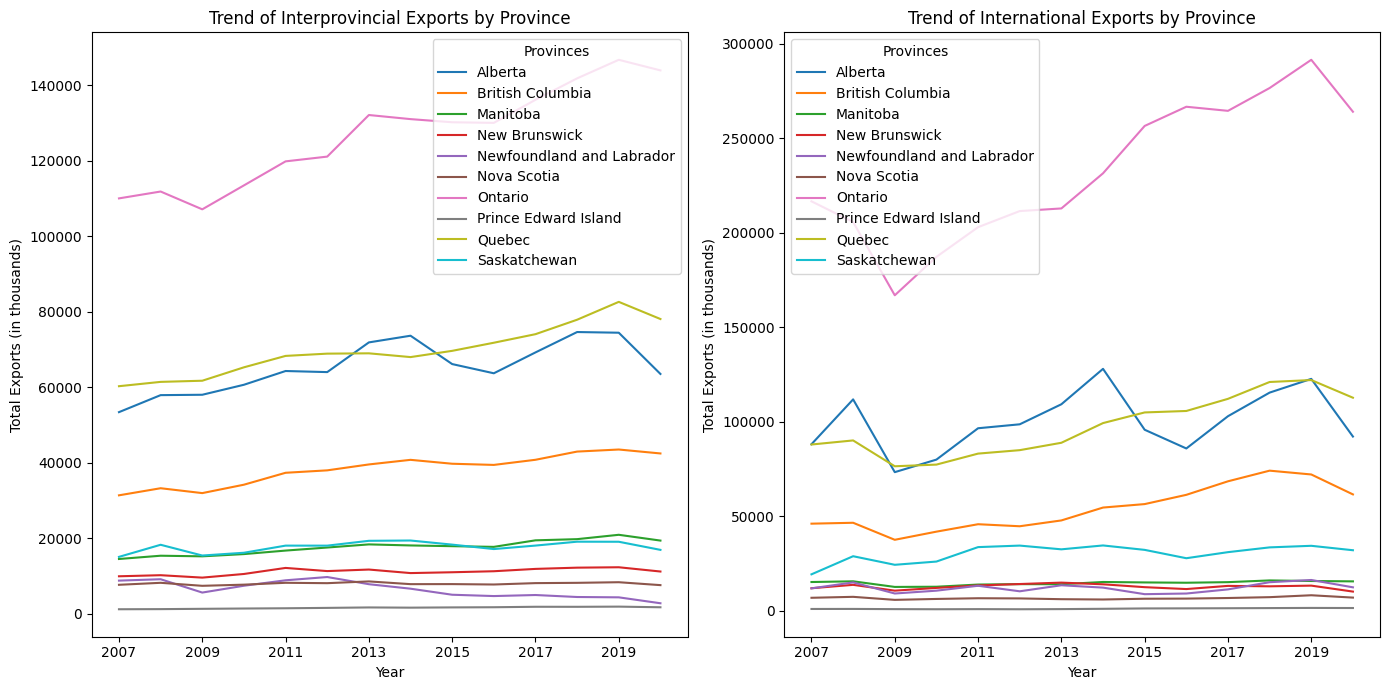

In [25]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
pivot_interprovincial.plot(ax=plt.gca())
plt.title('Trend of Interprovincial Exports by Province')
plt.xlabel('Year')
plt.ylabel('Total Exports (in thousands)')

plt.subplot(1, 2, 2)
pivot_international.plot(ax=plt.gca())
plt.title('Trend of International Exports by Province')
plt.xlabel('Year')
plt.ylabel('Total Exports (in thousands)')

plt.tight_layout()
plt.show()

In [15]:
grouped_data.head()

,Provinces,Year,ID,Interprovincial exports of total products,International exports of total products,Panel_ID
0,Alberta,2007,9.0,53360.0,88199.6,9.0_2007
1,Alberta,2008,9.0,57867.0,111903.7,9.0_2008
2,Alberta,2009,9.0,57966.3,73425.0,9.0_2009
3,Alberta,2010,9.0,60614.6,80059.1,9.0_2010
4,Alberta,2011,9.0,64258.6,96639.6,9.0_2011


Pie Chart Extra Work 

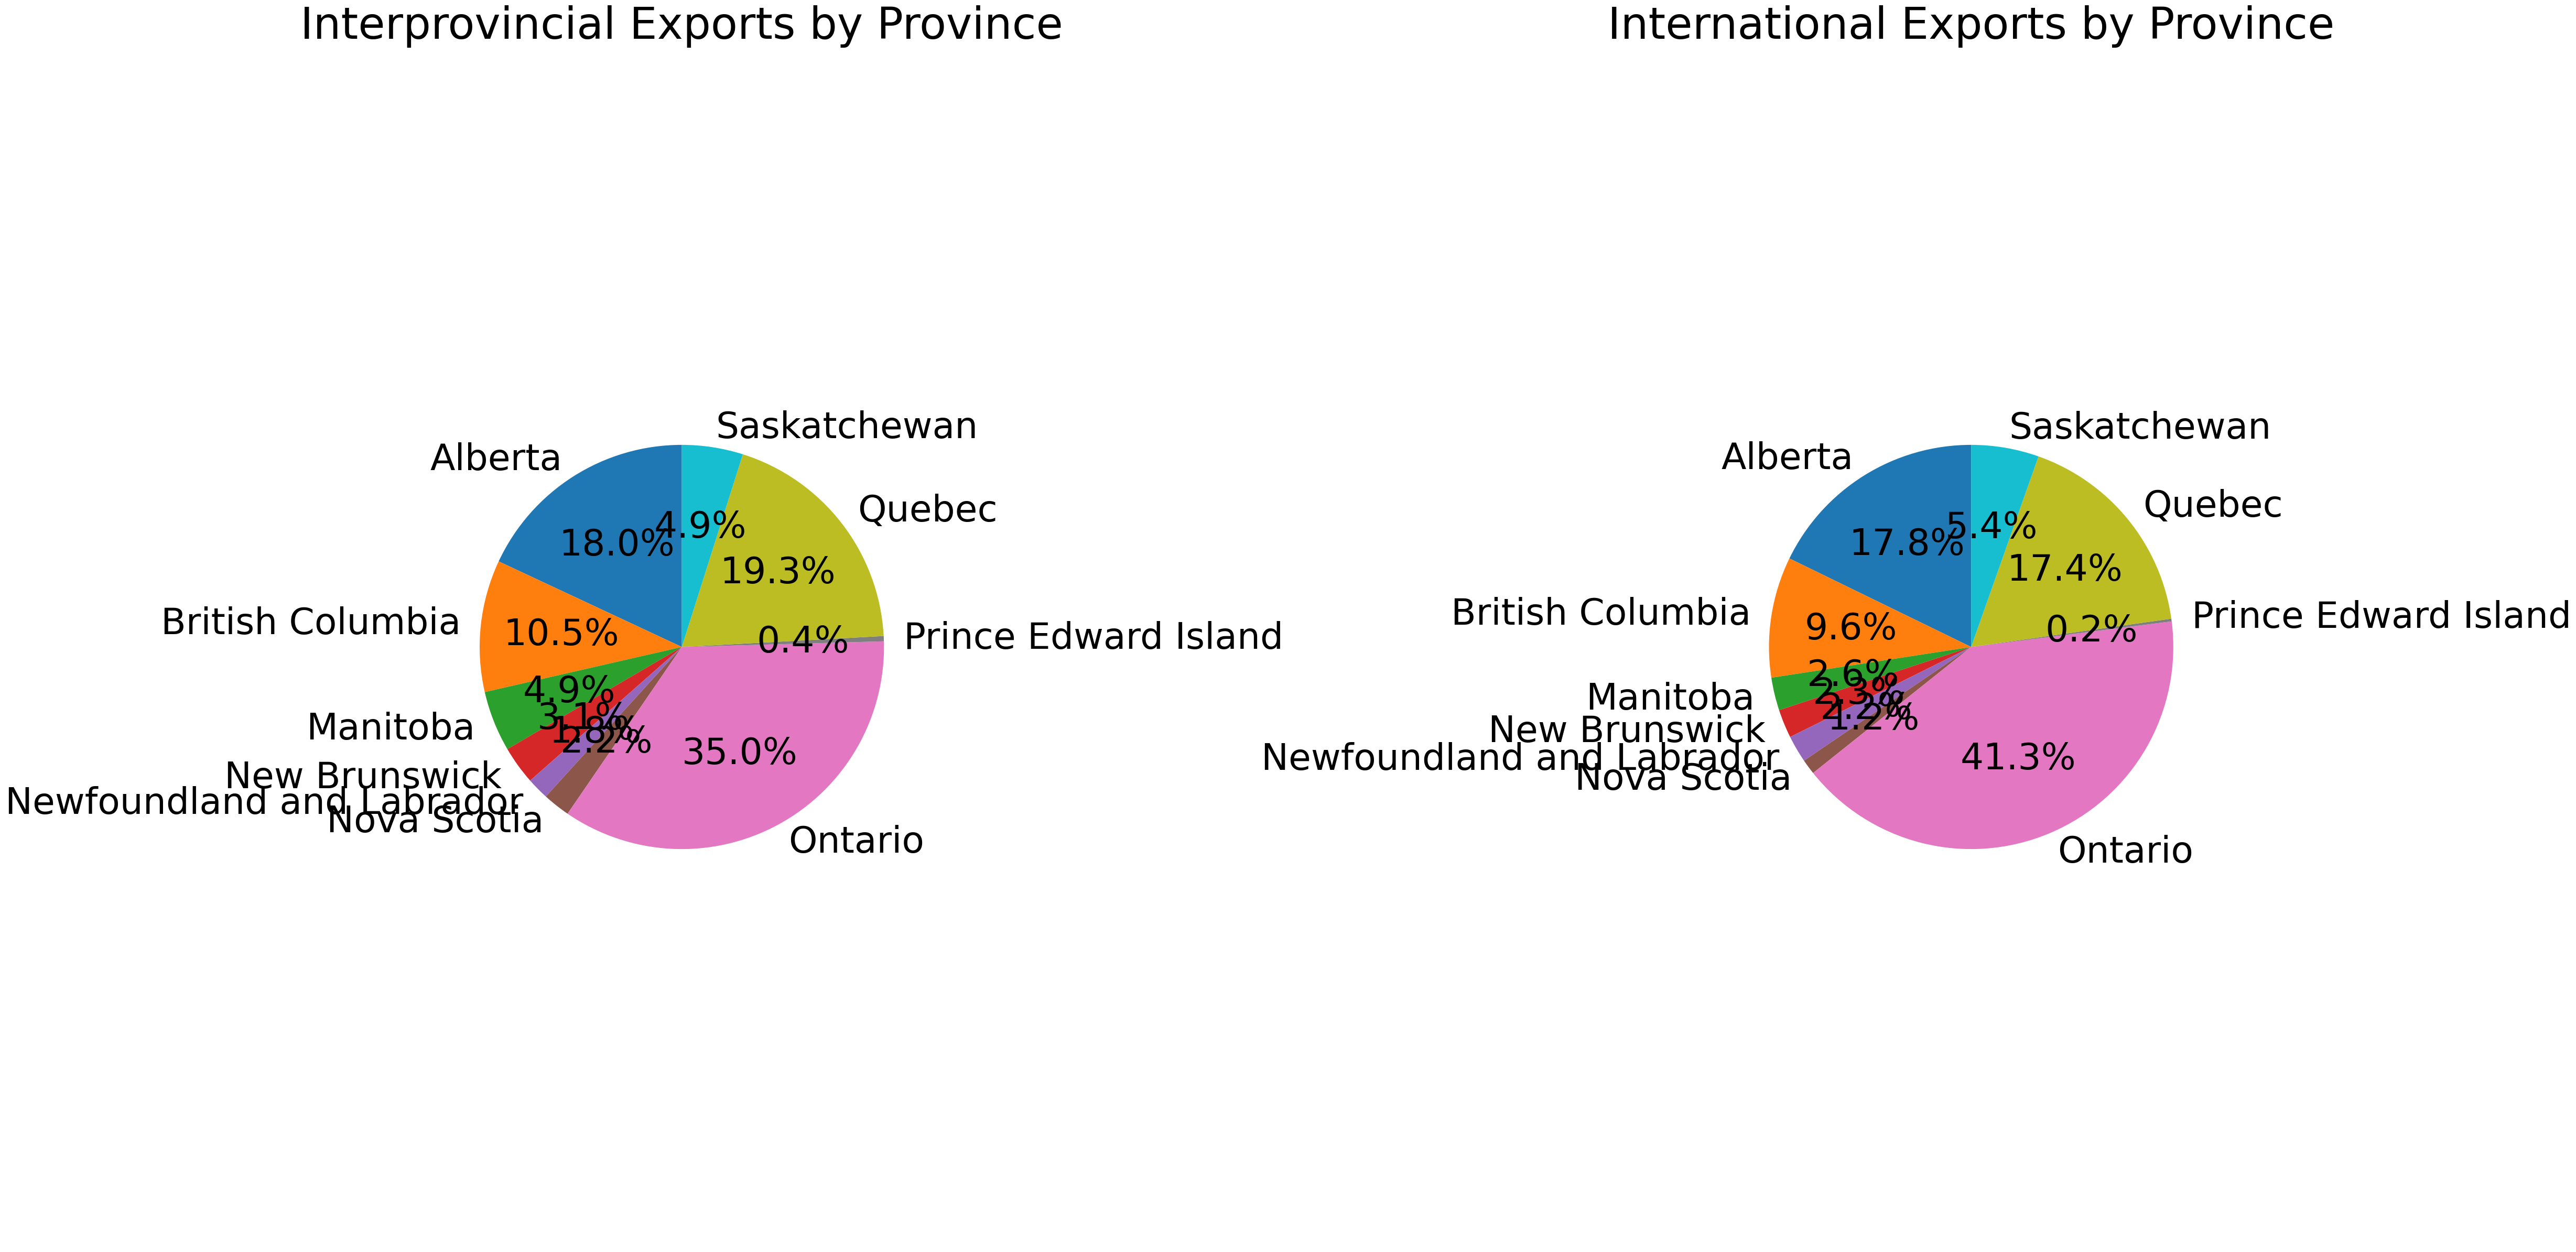

In [16]:
# Group data by province and calculate sums of exports
province_interprovincial = data_cleaned.groupby('Provinces')['Interprovincial exports of total products'].sum().reset_index()
province_international = data_cleaned.groupby('Provinces')['International exports of total products'].sum().reset_index()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(48, 24))

# Create a pie chart for interprovincial exports
axs[0].pie(province_interprovincial['Interprovincial exports of total products'], labels=province_interprovincial['Provinces'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 50})
axs[0].set_title('Interprovincial Exports by Province', fontsize=60)
axs[0].axis('equal')

# Create a pie chart for international exports
axs[1].pie(province_international['International exports of total products'], labels=province_international['Provinces'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 50})
axs[1].set_title('International Exports by Province', fontsize=60)
axs[1].axis('equal')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

2.5 answered 

2.5 Run a regression Dependant Variable : Interpronical Exports 

In [17]:
# Prepare the data for regression
X = grouped_data['International exports of total products']  # Independent variable
y = grouped_data['Interprovincial exports of total products']  # Dependent variable

# Add a constant to the independent variable (needed for OLS regression)
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X).fit()

# Get the regression results
regression_results = model.summary()
regression_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Interprovincial exports of total products   R-squared:                       0.969
Model:                                                   OLS   Adj. R-squared:                  0.968
Method:                                        Least Squares   F-statistic:                     4270.
Date:                                       Thu, 01 Aug 2024   Prob (F-statistic):          1.09e-105
Time:                                               14:36:28   Log-Likelihood:                -1433.6
No. Observations:                                        140   AIC:                             2871.
Df Residuals:                                            138   BIC:                             2877.
Df Model:                                                  1                                         
Covariance Type:                                   nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    5696.8962    742.233      7.675      0.000    4229.276    7164.516
International exports of total products     0.5423      0.008     65.345      0.000       0.526       0.559
==============================================================================
Omnibus:                        2.250   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                1.766
Skew:                           0.198   Prob(JB):                        0.413
Kurtosis:                       3.382   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
with open("ols.txt", "w") as file:
    # Your code that generates output
    output_data = str(regression_results)
    file.write(output_data)


2.6 Random Forest Model 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Splitting data into training and testing sets
X = data_cleaned[['International exports of total products']]
y = data_cleaned['Interprovincial exports of total products']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 34875959.783368394
R^2 Score: 0.9751760879099278


In [37]:
yt = np.array(y_test)
yp = np.array(y_pred)

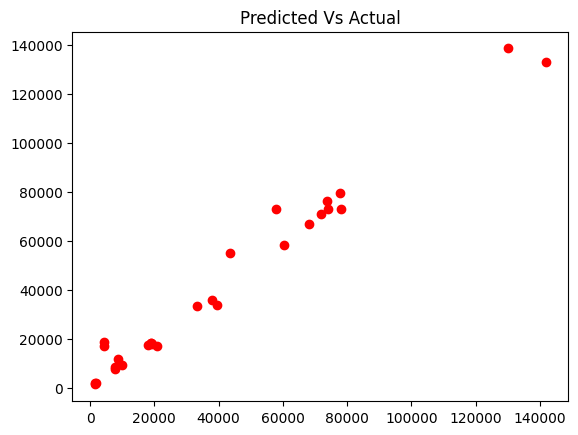

In [43]:
plt.title("Predicted Vs Actual")
plt.scatter(yt,yp, color = 'red')

Model has overfit 